In [1]:
%matplotlib inline
#%config InlineBackend.figure_format = 'svg'
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.tools.monitor import job_monitor
from qiskit.providers.ibmq import least_busy
from qiskit.visualization import plot_histogram

provider = IBMQ.load_account()

---
# 3. Running on Real Devices

## Question 3.1

**How do you find the least busy device to run the following circuit from the previous section?**

<img src="..\questions\advanced_circuits_images\merged.png" align="left" width="300"/>

**1)** `least_busy(provider.backends())`

**2)** `least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 5))`

**3)**  `provider.backends(filters=lambda x: x.configuration().n_qubits >= 5
  and not x.configuration().simulator
  and x.status().operational==True)`

**4)** Both 1 & 3 are correct

**5)** None of the above

### Solution to Q3.1:

Let's look at each option available.

**Option 1** does provide the least busy backend, however, it will include `ibmq_qasm_simulator`, which is not an device but a simulator. Furthermore, the circuit we need to run requires at least 5 qubits, which is not guaranteed with this command. Let's look at the options the `least_busy` command will select from if we go with option 1:

In [2]:
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_london') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_burlington') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_essex') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>]

**Option 2** does guarantee we will get a device with at least 5 qubits, however, it will still include the `ibmq_qasm_simulator`. Let's take a look:

In [3]:
provider.backends(filters=lambda x: x.configuration().n_qubits >= 5)

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_london') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_burlington') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_essex') from IBMQ(hub='ibm-q', group='open', project='main')>]

**Option 3** does actually provide the correct list of devices to select from (i.e., more than 5 qubits excluding the `ibmq_qasm_simulator`); however, this option does not have the `least_busy` command, so all it will do is list the backends, not select the one we want:

In [4]:
provider.backends(filters=lambda x: x.configuration().n_qubits >= 5
and not x.configuration().simulator
and x.status().operational==True)

[<IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_london') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_burlington') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_essex') from IBMQ(hub='ibm-q', group='open', project='main')>]

### Answer to Q3.1: 

5) None of the above

---
## Question 3.2

**How do you retrieve the last run job from a backend?**

**1)** `backend.jobs()[0]`

**2)** `backend.jobs()[-1]`

**3)** `backend.retrieve_job()[0]`

**4)** `backend.retrieve_job()[-1]`

**5)** None of the above

### Solution to Q3.2:
**Option 1** will provide us the last job we ran on a given backend. This [1MinuteQiskit](https://www.youtube.com/watch?v=09-Qsge_qqo&list=PLOFEBzvs-VvpOCmJ9BonUhf7NYB4d1p0e&index=8) video explains it very well.

We can also check this by running a quick experiment:

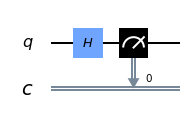

In [5]:
qc = QuantumCircuit(1,1)
qc.h(0)
qc.measure(0,0)
qc.draw('mpl')

In [6]:
backend = provider.get_backend('ibmq_vigo')
job = execute(qc, backend = backend)
job_monitor(job)

Job Status: job has successfully run


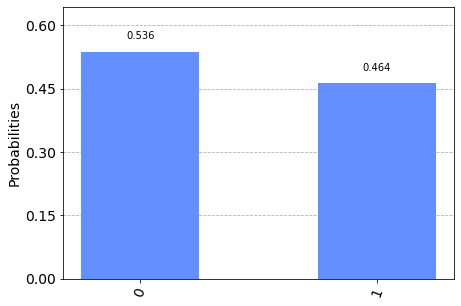

In [7]:
plot_histogram(job.result().get_counts(qc))

Now let's retrive and plot the result from the last job we ran (should be same as above):

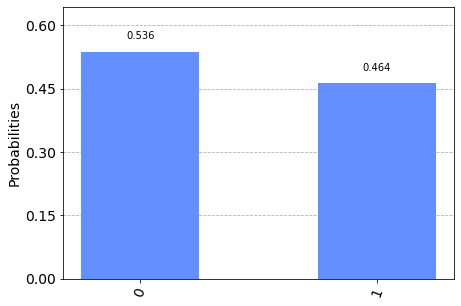

In [8]:
job = backend.jobs()[0]
plot_histogram(job.result().get_counts())

### Answer to Q3.2: 

**1)** ``backend.jobs()[0]``